In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf

In [72]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
s5_file='data/child-talking-theres-a-daddy.wav'
s4_file='data/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='data/mathias-words-request.wav'

In [71]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_22428\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [ ]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

https://stats.stackexchange.com/questions/52976/is-a-sample-covariance-matrix-always-symmetric-and-positive-definite 

In [75]:
W = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.

component 0
iteration : 0 : distance 0.17737525701522827
iteration : 1 : distance 0.12872719764709473
iteration : 2 : distance 0.009207725524902344
iteration : 3 : distance 9.298324584960938e-06
iteration : 4 : distance 0.0
component 1
iteration : 0 : distance 0.4078522324562073
iteration : 1 : distance 1.1920928955078125e-07
iteration : 2 : distance 1.1920928955078125e-07
component 2
iteration : 0 : distance 0.1338372826576233
iteration : 1 : distance 1.1920928955078125e-07
iteration : 2 : distance 1.1920928955078125e-07


In [78]:
unMixed = np.dot(W,Xw)


[1.5865053e-03 7.0391950e+16 3.4654005e+06]


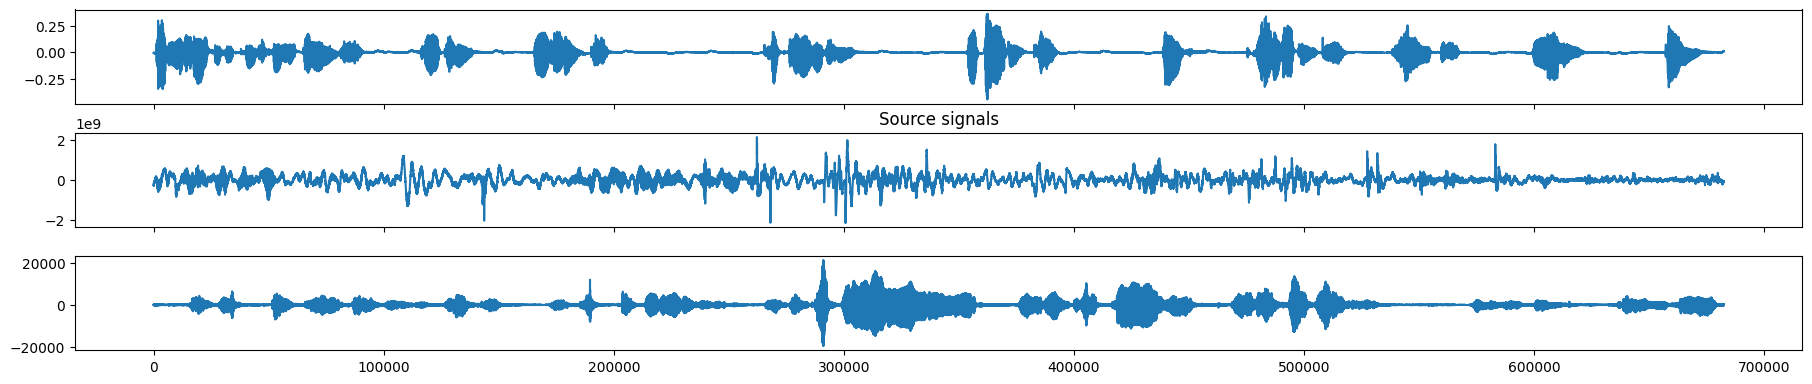

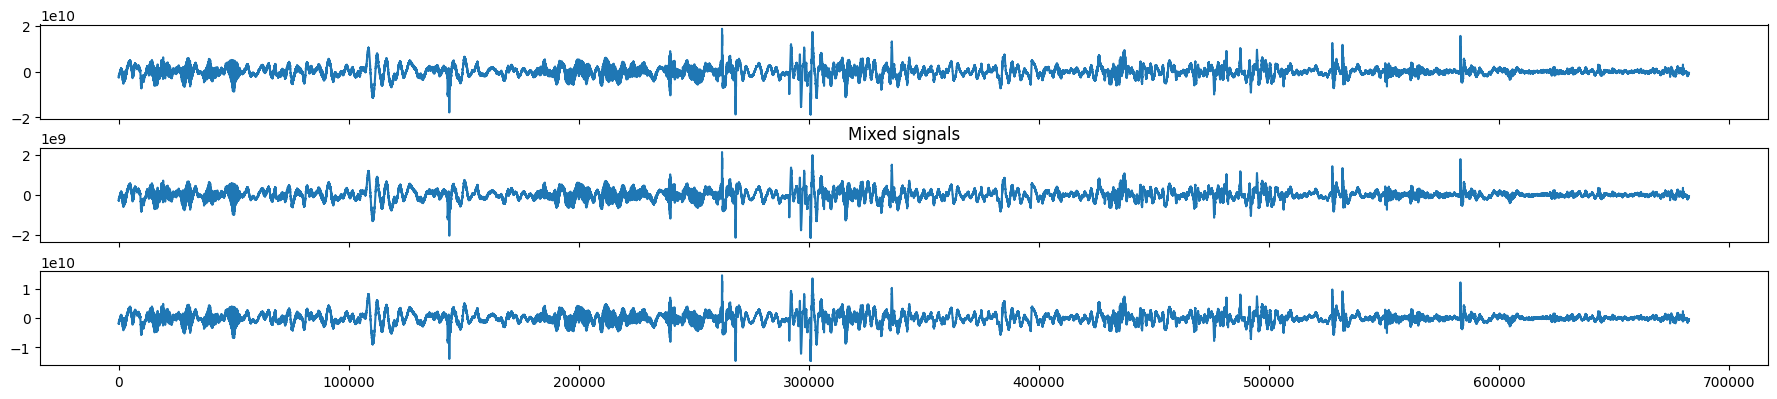

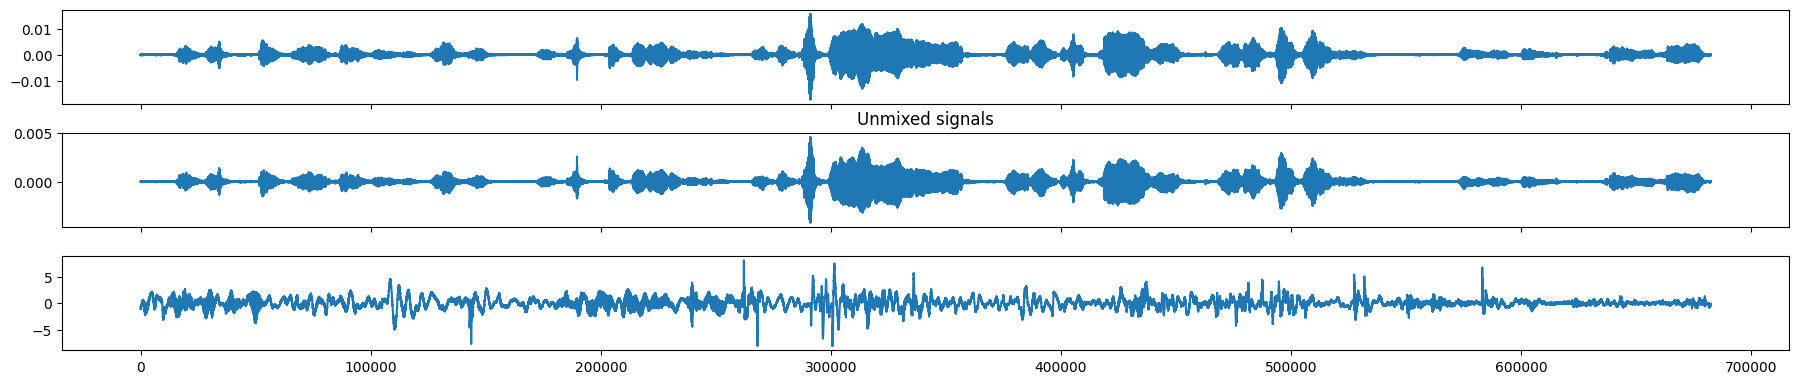

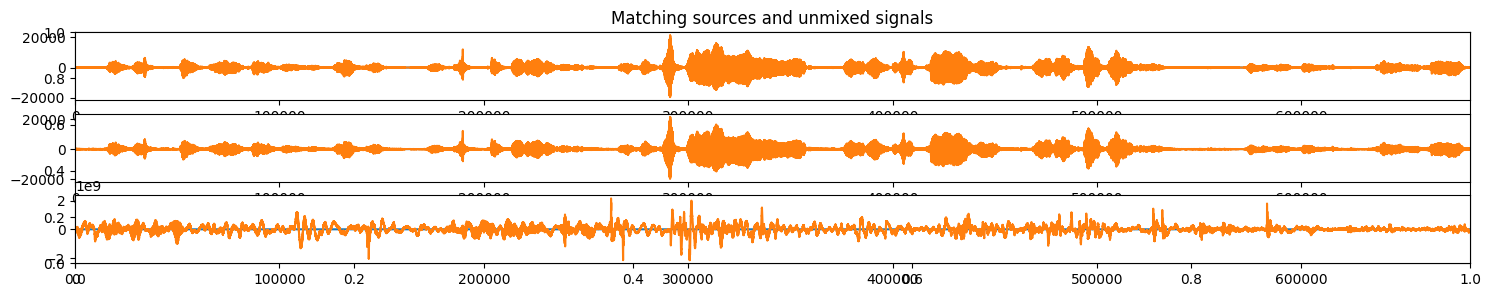

In [79]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)

The signal that has very low amplitude is not recovered. We try to normalise the sources beforehand : 

In [80]:
S, X, Xw = mix_sources(S)
W = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.
unMixed = np.dot(W,Xw)


[ 1.1047598e+19 -1.3726023e+14  4.8855617e+17]
[1.7492435e+19 1.5429216e+18 6.7531592e+17]
component 0
iteration : 0 : distance 0.05539417266845703
iteration : 1 : distance 0.04638838768005371
iteration : 2 : distance 0.002400040626525879
iteration : 3 : distance 6.324052810668945e-05
iteration : 4 : distance 2.205371856689453e-06
iteration : 5 : distance 0.0
component 1
iteration : 0 : distance 0.948255006223917
iteration : 1 : distance 0.004463255405426025
iteration : 2 : distance 0.0002434849739074707
iteration : 3 : distance 9.357929229736328e-06
iteration : 4 : distance 3.5762786865234375e-07
iteration : 5 : distance 0.0
component 2
iteration : 0 : distance 0.8719191700220108
iteration : 1 : distance 0.0


[5.4801777e+16 7.0396335e+16 3.4896657e+16]


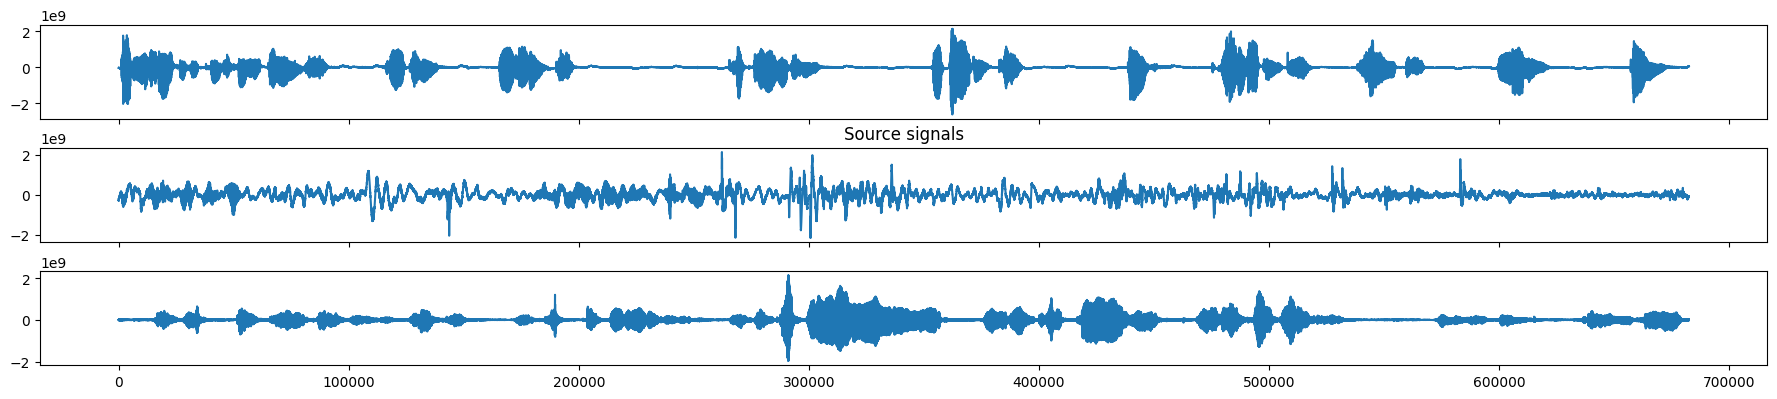

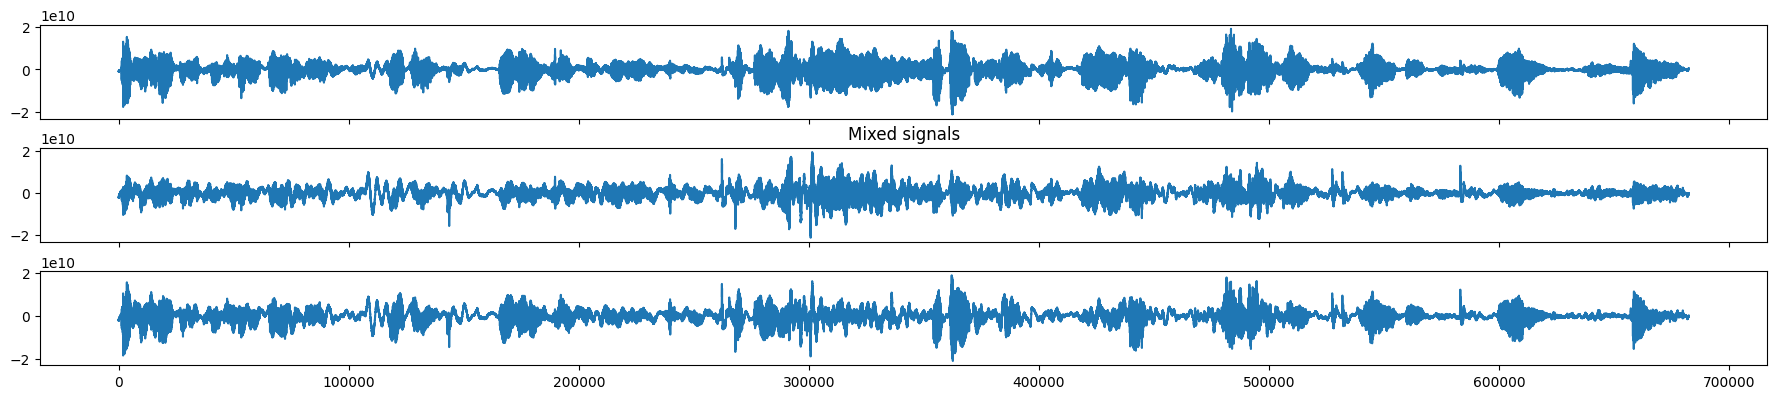

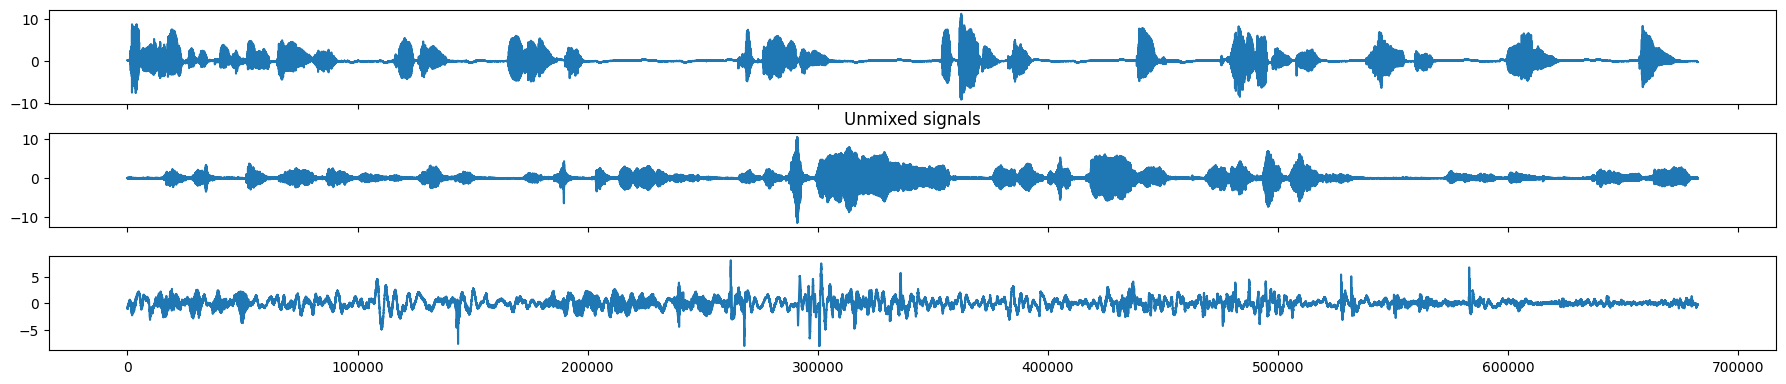

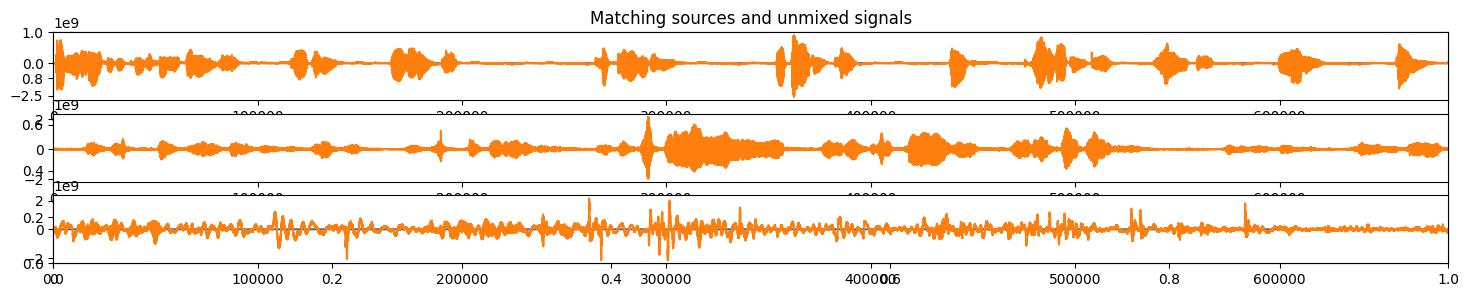

In [81]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[1].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)

In [45]:
wf.write('inference/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('inference/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('inference/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))